In [1]:
import pandas as pd

# Importar los datos
df = pd.read_csv("manufacturing_defect_dataset_OK .csv", sep=';', engine='python')


In [3]:
df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403780,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046090,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.821000,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [5]:
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64


In [7]:
df.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211138,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140274,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204660,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822302,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462427,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365550,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


In [9]:
print("Distribución de la variable 'DefectStatus':")
print(df['DefectStatus'].value_counts(normalize=True))

Distribución de la variable 'DefectStatus':
DefectStatus
1    0.840432
0    0.159568
Name: proportion, dtype: float64


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [81]:
X = df.drop("DefectStatus", axis=1)
y = df["DefectStatus"]

# División en entrenamiento y prueba (puedes reservar también validación si no usas GridSearchCV)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [83]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predicciones y evaluación inicial
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))
print("Evaluación del modelo :")

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       103
           1       0.94      0.94      0.94       545

    accuracy                           0.90       648
   macro avg       0.81      0.82      0.81       648
weighted avg       0.90      0.90      0.90       648

Evaluación del modelo :
[[ 72  31]
 [ 34 511]]


In [85]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [87]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # validación cruzada de 5 particiones
    scoring='recall',  # métrica de optimización
    n_jobs=-1,  # usa todos los núcleos del procesador
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall', verbose=1)

In [88]:
# Extraer los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo con esos parámetros
mejor_modelo = DecisionTreeClassifier(**best_params, random_state=42)

# Reentrenar con todo el conjunto de entrenamiento
mejor_modelo.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)
y_proba_tree = mejor_modelo.predict_proba(X_test)[:, 1]

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("Evaluación del modelo ajustado:")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_tree))

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Evaluación del modelo ajustado:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.94      0.86      0.89       648
weighted avg       0.95      0.95      0.94       648

[[ 75  28]
 [  6 539]]
ROC-AUC: 0.852872539413913


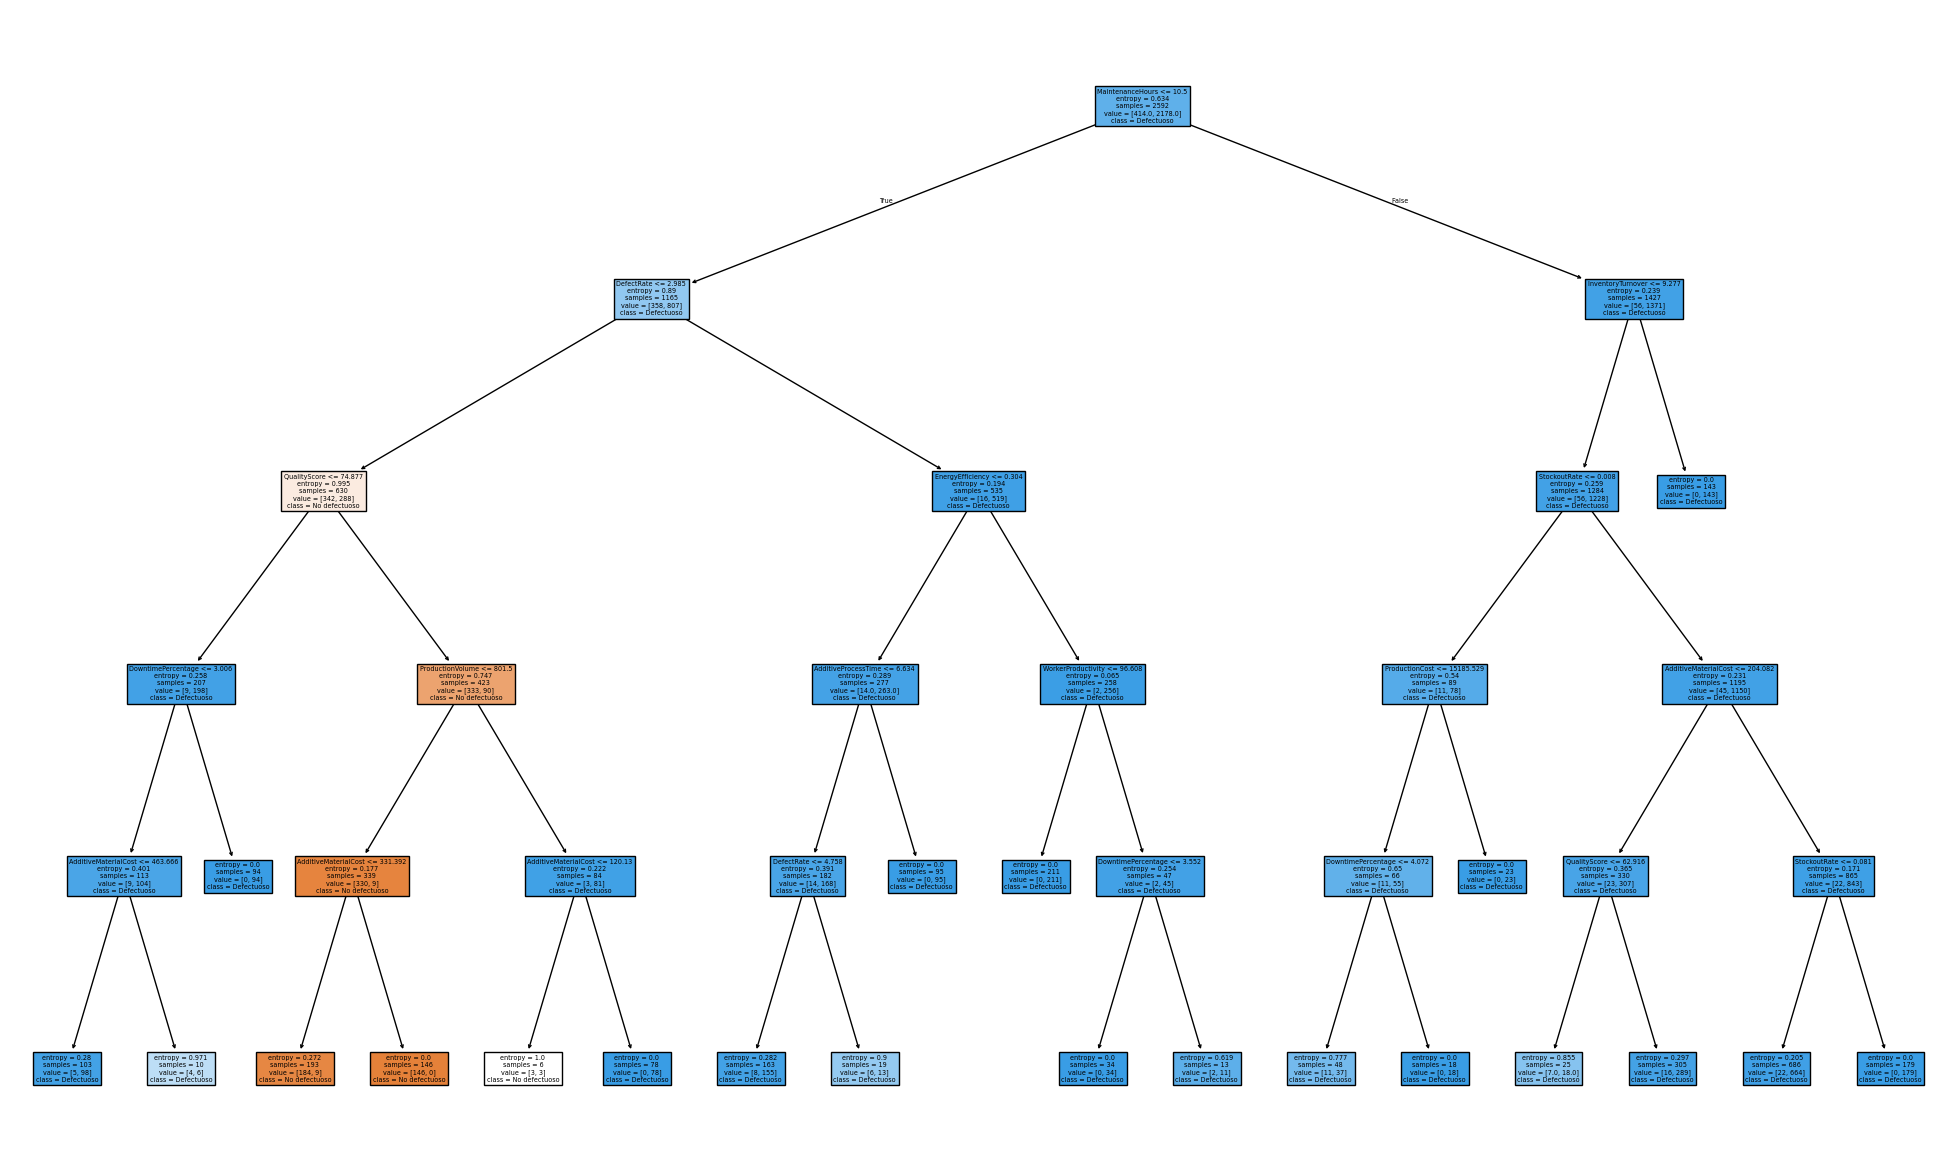

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
plot_tree(mejor_modelo, filled=True, feature_names=X.columns, class_names=['No defectuoso', 'Defectuoso'])
plt.show()


Text(0.5, 1.0, 'Matriz de Confusión - Árbol de decisión ajustado')

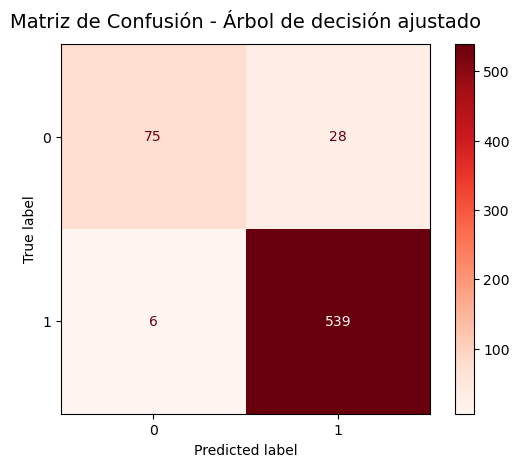

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(mejor_modelo, X_test, y_test, cmap='Reds')
plt.title("Matriz de Confusión - Árbol de decisión ajustado", fontsize=14, pad=12)

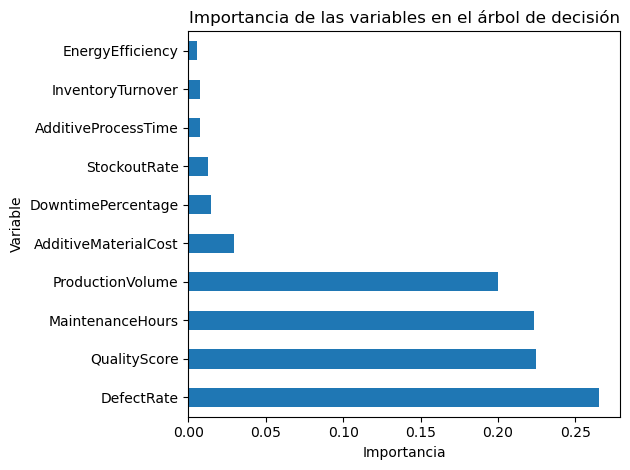

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

importancias = pd.Series(mejor_modelo.feature_importances_, index=X.columns)
importancias.nlargest(10).plot(kind='barh')

plt.title('Importancia de las variables en el árbol de decisión')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()



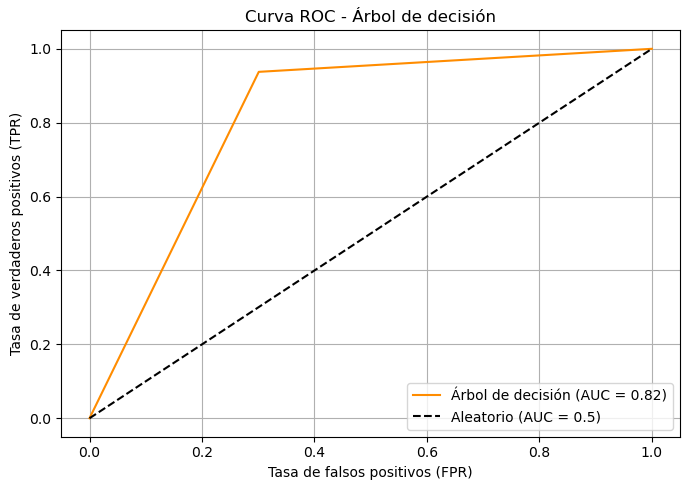

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegúrate de tener tus datos X e y definidos

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Obtener probabilidades de clase positiva
y_prob = tree_model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Árbol de decisión (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio (AUC = 0.5)")
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Árbol de decisión')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
